In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def my_arbitrary_gaussian(x):
    return -3*np.exp(-((x-2)**2/2**2)) + 2*np.exp(-((x-5)**2/4))  - 2*np.exp(-(x-7)**2)  + 3

In [103]:
def bias_potential(p):
    x = np.linspace(p-0.7, p+0.7, 100)
    y = 3*np.square(x-p) + my_arbitrary_gaussian(p)
    return x, y

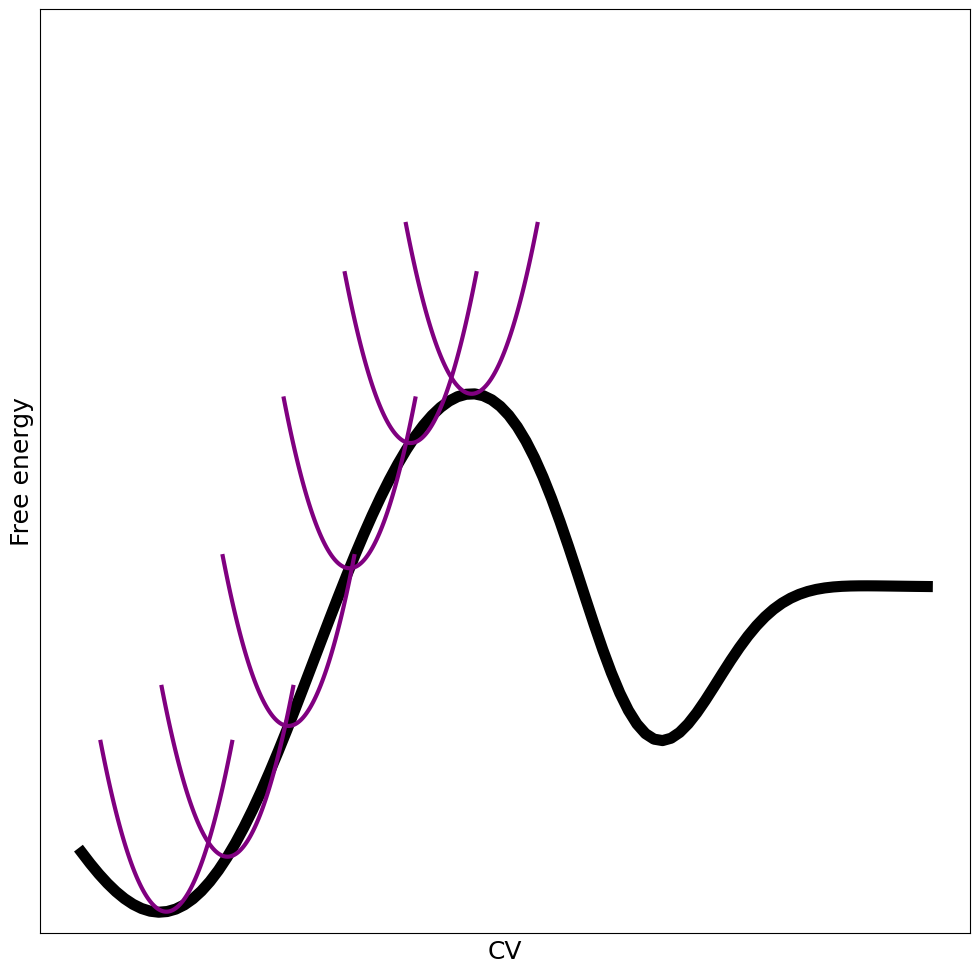

In [104]:
x = np.linspace(1,10,100)
y = my_arbitrary_gaussian(x)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_ylim([0,8])
ax.plot(x, y, linewidth=8, color="black")
ax.set_ylabel("Free energy", fontsize=18)
ax.set_xlabel("CV", fontsize=18)
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

points = [1.9 + 0.65*x for x in range(6)]
for p in points:
    x, y = bias_potential(p)
    ax.plot(x, y, linewidth=3, color="purple")

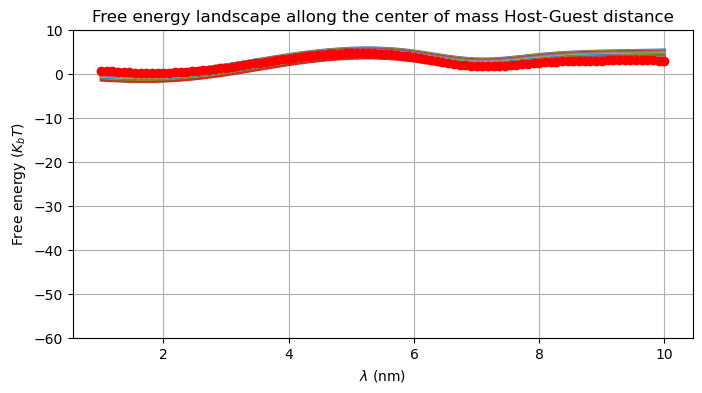

In [95]:
def Umbrella_Bias(r, k, r_0):
    return 1/(2*k)*(r-r_0)*2
T = 1
k= 4
R = 8.314 #J/Mol
beta = 1

n_windows = 24
windows = np.linspace(0, 10, n_windows)

fig, ax = plt.subplots(figsize=(8,4))

Free_energy  = my_arbitrary_gaussian(np.linspace(1,10,100))
for window in windows:
    ax.plot(np.linspace(1,10,100),Free_energy + beta*Umbrella_Bias(np.linspace(1,10,100),k,window))
ax.plot(np.linspace(1,10,100),Free_energy, '-or')
ax.set_ylabel(r"Free energy ($K_b T$)")
ax.set_xlabel(r"$\lambda$ (nm)")
ax.set_title("Free energy landscape allong the center of mass Host-Guest distance")
ax.set_ylim([-60,10])
plt.grid()
plt.show()